In [ ]:
!apt-get install openjdk-11-jdk -y
!pip install pyspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxt-dev libxtst6 libxxf86dga1 openjdk-11-jre
  x11-utils
Suggested packages:
  libxt-doc openjdk-11-demo openjdk-11-source visualvm mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxt-dev libxtst6 libxxf86dga1 openjdk-11-jdk
  openjdk-11-jre x11-utils
0 upgraded, 10 newly installed, 0 to remove and 35 not upgraded.
Need to get 6,920 kB of archives.
After this operation, 16.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-core all 2.37-2build1 [1,041 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-extra all 2.37-2build1 [2,041 kB]
Get:3 http://archive.ubuntu.com/ubuntu jam

In [ ]:
from pyspark.sql import SparkSession

# Start Spark session
spark = SparkSession.builder.appName("YouTube Analysis").getOrCreate()

# Load CSV file (path should be exactly as shown in Colab)
df = spark.read.csv("/content/INvideos.csv", header=True, inferSchema=True)

# Preview the data
df.show(5)


+-----------+-------------+--------------------+---------------+-----------+--------------------+--------------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|  channel_title|category_id|        publish_time|                tags|  views|likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+---------------+-----------+--------------------+--------------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|kzwfHumJyYc|     17.14.11|Sharry Mann: Cute...|Lokdhun Punjabi|          1|2017-11-12T12:20:...|"sharry mann|""sh...|1096327|33966|     798|          882|https://i.ytimg.c...|            false|           false|                 fals

In [ ]:
# Show schema to understand data types
df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: boolean (nullable = true)
 |-- ratings_disabled: boolean (nullable = true)
 |-- video_error_or_removed: boolean (nullable = true)
 |-- description: string (nullable = true)



In [ ]:
from pyspark.sql.functions import col, isnan, when, count

# Count null or missing values in each column
df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns]).show()



AnalysisException: [DATATYPE_MISMATCH.UNEXPECTED_INPUT_TYPE] Cannot resolve "isnan(comments_disabled)" due to data type mismatch: Parameter 1 requires the ("DOUBLE" or "FLOAT") type, however "comments_disabled" has the type "BOOLEAN".;
'Aggregate [count(CASE WHEN (isnull(video_id#17) OR isnan(cast(video_id#17 as double))) THEN video_id END) AS video_id#387L, count(CASE WHEN (isnull(trending_date#18) OR isnan(cast(trending_date#18 as double))) THEN trending_date END) AS trending_date#389L, count(CASE WHEN (isnull(title#19) OR isnan(cast(title#19 as double))) THEN title END) AS title#391L, count(CASE WHEN (isnull(channel_title#20) OR isnan(cast(channel_title#20 as double))) THEN channel_title END) AS channel_title#393L, count(CASE WHEN (isnull(category_id#21) OR isnan(cast(category_id#21 as double))) THEN category_id END) AS category_id#395L, count(CASE WHEN (isnull(publish_time#22) OR isnan(cast(publish_time#22 as double))) THEN publish_time END) AS publish_time#397L, count(CASE WHEN (isnull(tags#23) OR isnan(cast(tags#23 as double))) THEN tags END) AS tags#399L, count(CASE WHEN (isnull(views#24) OR isnan(cast(views#24 as double))) THEN views END) AS views#401L, count(CASE WHEN (isnull(likes#25) OR isnan(cast(likes#25 as double))) THEN likes END) AS likes#403L, count(CASE WHEN (isnull(dislikes#26) OR isnan(cast(dislikes#26 as double))) THEN dislikes END) AS dislikes#405L, count(CASE WHEN (isnull(comment_count#27) OR isnan(cast(comment_count#27 as double))) THEN comment_count END) AS comment_count#407L, count(CASE WHEN (isnull(thumbnail_link#28) OR isnan(cast(thumbnail_link#28 as double))) THEN thumbnail_link END) AS thumbnail_link#409L, count(CASE WHEN (isnull(comments_disabled#29) OR isnan(comments_disabled#29)) THEN comments_disabled END) AS comments_disabled#411, count(CASE WHEN (isnull(ratings_disabled#30) OR isnan(ratings_disabled#30)) THEN ratings_disabled END) AS ratings_disabled#413, count(CASE WHEN (isnull(video_error_or_removed#31) OR isnan(video_error_or_removed#31)) THEN video_error_or_removed END) AS video_error_or_removed#415, count(CASE WHEN (isnull(description#32) OR isnan(cast(description#32 as double))) THEN description END) AS description#417L]
+- Filter atleastnnonnulls(16, video_id#17, trending_date#18, title#19, channel_title#20, category_id#21, publish_time#22, tags#23, views#24, likes#25, dislikes#26, comment_count#27, thumbnail_link#28, comments_disabled#29, ratings_disabled#30, video_error_or_removed#31, description#32)
   +- Relation [video_id#17,trending_date#18,title#19,channel_title#20,category_id#21,publish_time#22,tags#23,views#24,likes#25,dislikes#26,comment_count#27,thumbnail_link#28,comments_disabled#29,ratings_disabled#30,video_error_or_removed#31,description#32] csv


In [ ]:
# Drop nulls (optional — only if many nulls are present)
df = df.dropna()

In [ ]:
df.orderBy(col("views").desc()).select("title", "channel_title", "views").show(1)

+--------------------+-------------+-------+
|               title|channel_title|  views|
+--------------------+-------------+-------+
|NIRAHUA HINDUSTAN...|   Wave Music|9998338|
+--------------------+-------------+-------+
only showing top 1 row



In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.types import LongType

df.groupBy("channel_title") \
  .sum(col("views").cast(LongType())) \
  .orderBy(col("sum(views)").desc()) \
  .show(5)

PySparkTypeError: [NOT_ITERABLE] Column is not iterable.

In [ ]:
df.orderBy(col("likes").desc()).select("title", "channel_title", "likes").show(5)


+--------------------+----------------+-----+
|               title|   channel_title|likes|
+--------------------+----------------+-----+
|Janasena Chief Pa...|          AP24x7| 9996|
|Viva News - EP 10...|            VIVA| 9990|
|Super Singer 6 Ep...|Vijay Television| 9990|
|Simbu Atrocities ...|   Nakkheeran TV|  999|
|Mogalirekulu | 29...|       Gemini TV|  999|
+--------------------+----------------+-----+
only showing top 5 rows



In [ ]:
df.groupBy("category_id").count().orderBy("count", ascending=False).show()



+-----------+-----+
|category_id|count|
+-----------+-----+
|         24|16462|
|         25| 5172|
|         10| 3857|
|         23| 3407|
|         22| 2494|
|          1| 1649|
|         27| 1180|
|         26|  837|
|         17|  712|
|         28|  548|
|         43|  205|
|         29|  105|
|          2|   69|
|         20|   66|
|         30|   16|
|         19|    8|
|         15|    3|
+-----------+-----+



In [ ]:
!pip install seaborn


In [ ]:
# Group by channel and sum views
top_channels = df.groupBy("channel_title").sum("views") \
                 .orderBy("sum(views)", ascending=False) \
                 .limit(5)

# Convert to Pandas
top_channels_pd = top_channels.toPandas()


AnalysisException: "views" is not a numeric column. Aggregation function can only be applied on a numeric column.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt




In [ ]:
# Set style
sns.set(style="whitegrid")




In [ ]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_channels_pd, x="sum(views)", y="channel_title", palette="coolwarm")
plt.title("Top 5 Channels by Total Views", fontsize=16)
plt.xlabel("Total Views")
plt.ylabel("Channel")
plt.tight_layout()
plt.show()

NameError: name 'top_channels_pd' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 1. Group by channel and sum views
top_channels = df.groupBy("channel_title") \
                 .sum("views") \
                 .orderBy("sum(views)", ascending=False) \
                 .limit(5)

# 2. Rename the column for clarity (optional but helpful)
top_channels = top_channels.withColumnRenamed("sum(views)", "total_views")

# 3. Convert to Pandas (make sure it's a small DataFrame)
top_channels_pd = top_channels.toPandas()

# 4. Install seaborn if not already
!pip install seaborn

# 5. Plot using seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# 6. Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_channels_pd,
            x="total_views",
            y="channel_title",
            palette="viridis")

plt.title("Top 5 YouTube Channels by Total Views", fontsize=16)
plt.xlabel("Total Views")
plt.ylabel("Channel Title")
plt.tight_layout()
plt.show()


AnalysisException: "views" is not a numeric column. Aggregation function can only be applied on a numeric column.

In [ ]:
from pyspark.sql.functions import col

# Cast 'views' column to Integer
df = df.withColumn("views", col("views").cast("int"))

# Now safely group and sum
top_channels = df.groupBy("channel_title") \
                 .sum("views") \
                 .orderBy("sum(views)", ascending=False) \
                 .limit(5)

# Rename the column for plotting
top_channels = top_channels.withColumnRenamed("sum(views)", "total_views")

# Convert to Pandas
top_channels_pd = top_channels.toPandas()


In [ ]:
df = df.withColumn("likes", col("likes").cast("int"))
df = df.withColumn("dislikes", col("dislikes").cast("int"))
df = df.withColumn("comment_count", col("comment_count").cast("int"))


In [ ]:
from pyspark.sql.functions import col

# Cast 'views' column to Integer
df = df.withColumn("views", col("views").cast("int"))

# Now safely group and sum
top_channels = df.groupBy("channel_title") \
                 .sum("views") \
                 .orderBy("sum(views)", ascending=False) \
                 .limit(5)

# Rename the column for plotting
top_channels = top_channels.withColumnRenamed("sum(views)", "total_views")

# Convert to Pandas
top_channels_pd = top_channels.toPandas()


/tmp/ipython-input-27-2754872116.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_channels_pd,


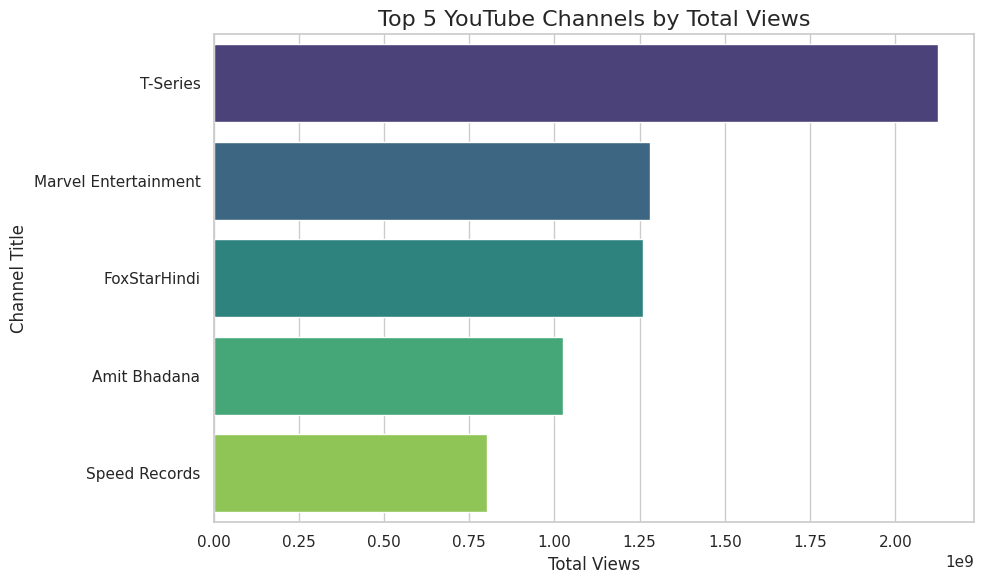

In [ ]:
# 1. Group by channel and sum views
top_channels = df.groupBy("channel_title") \
                 .sum("views") \
                 .orderBy("sum(views)", ascending=False) \
                 .limit(5)

# 2. Rename the column for clarity (optional but helpful)
top_channels = top_channels.withColumnRenamed("sum(views)", "total_views")

# 3. Convert to Pandas (make sure it's a small DataFrame)
top_channels_pd = top_channels.toPandas()

# 4. Install seaborn if not already
!pip install seaborn

# 5. Plot using seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# 6. Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_channels_pd,
            x="total_views",
            y="channel_title",
            palette="viridis")

plt.title("Top 5 YouTube Channels by Total Views", fontsize=16)
plt.xlabel("Total Views")
plt.ylabel("Channel Title")
plt.tight_layout()
plt.show()
